# Bayesian Conjugate

In [1]:
import numpy as np
import pandas as pd

from skpro.distributions import Beta
from skpro.regression.bayesian_proportion import BayesianProportionEstimator

Conjugate Bayesian analysis is a statistical method where the posterior distribution belongs to the same family as the prior distribution. 

In this notebook, we will use the `skpro` estimator `BayesianProportionEstimator` to demonstrate the application of Bayesian conjugates in the estimation of proportion.

Based on the data above, we aim to estimate the proportion $p$ of heads. However, due to the small sample size, we might be uncertain about our estimate. This is where Bayesian analysis, and specifically the use of conjugate priors, becomes valuable.

# Motivation for Estimating Proportions: The Coin Toss Example

Estimating proportions is a fundamental problem in statistics, often arising in situations where we want to understand the likelihood of a specific outcome. A classic example is the coin toss.

Imagine we have a coin, and we want to determine if it is fair. A fair coin has an equal probability (0.5) of landing heads or tails. To estimate this probability, we can perform a series of coin tosses and observe the outcomes.

Suppose we toss the coin 10 times and observe the following results:

- Heads: 8 times
- Tails: 2 times

This coin toss sample is represented in the pandas Series `y` shown below.

In [2]:
# Define the number of ones and zeros
ones = [1] * 8
zeros = [0] * 2

# Combine them into a single list
data = ones + zeros

# Shuffle the list to randomize the order
np.random.shuffle(data)

# Create a Series from the shuffled list
y = pd.Series(data, name="head")

y

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    1
Name: head, dtype: int64

Based on this data, we aim to estimate the proportion `p` of heads. However, due to the small sample size, we might be uncertain about our estimate. This is where Bayesian analysis becomes valuable.


# Prior

A Bayesian analysis begins with a **prior belief** about the parameter of interest, which in this case is the proportion `p`. This prior belief is represented by a **prior _distribution_**, which encapsulates our initial assumptions about `p` before observing any data. The choice of distribution can be based on previous knowledge, expert opinion, or even non-informative (if we have no prior knowledge).

A **conjugate prior** is a specific type of prior distribution that, when combined with the likelihood of the observed data, yields a posterior distribution that belongs to the same family as the prior distribution. This property simplifies the process of updating our beliefs with new data, as the mathematical form of the distribution remains consistent.

The **Beta distribution** is often chosen as the prior distribution because it is a conjugate prior to the Binomial likelihood, which describes the probability of observing a given number of heads in a series of coin tosses.


The distribution, denoted as $\text{Beta}(\alpha, \beta)$, is parameterized by two positive parameters, $\alpha$ and $\beta$. These parameters reflect our prior beliefs about the proportion $p$. For example:

- If $\alpha = 1$ and $\beta = 1$, we have a uniform prior, which indicates that all values of $p$ between 0 and 1 are equally likely.
- If $\alpha > 1$ and $\beta > 1$, the prior might be more peaked around a particular value, indicating a stronger prior belief about $p$.

Suppose in our case that we have some conviction that the coin is fair, meaning we believe the proportion $p$ is centered around 0.5. To reflect this belief, we will choose a Beta distribution with parameters $\alpha = 2$ and $\beta = 2$. This distribution is symmetric and centered around 0.5, indicating our prior belief that the coin is likely fair but allowing for some uncertainty.

To implement this in our analysis, we will instantiate a new `BayesianProportionEstimator` object, `B`. This object encapsulates our prior belief on `p` and provides the framework for updating this belief based on observed data. 

Here's how we can set this up in code:

In [3]:
B = BayesianProportionEstimator(prior=Beta(2, 2))
# alternative instantiation:
B = BayesianProportionEstimator(prior_alpha=2, prior_beta=2)

We can use the plot function to visualize the probability density function (PDF) of our prior distribution. This visualization helps us understand our initial belief about `p`. By plotting the PDF of the $Beta(2, 2)$ distribution, we can see how our belief is symmetrically distributed around the value 0.5, reflecting our prior conviction that the coin is fair with some allowance for variability.

<Axes: xlabel='x', ylabel='pdf(x)'>

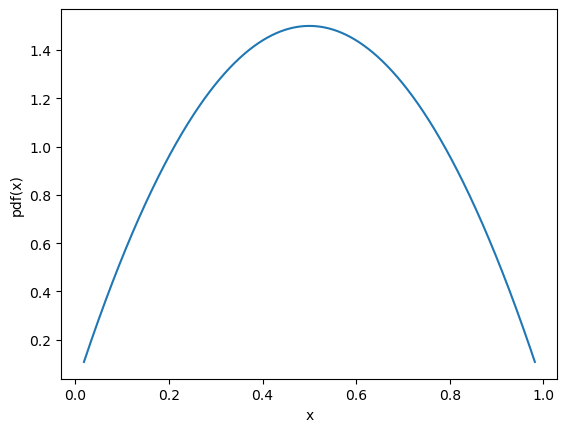

In [4]:
B.prior.plot("pdf")

# Likelihood and Posterior

The likelihood function represents the probability of observing the data given the parameter $p$. For coin tosses, this is described by the Binomial distribution. If we observe $k$ heads out of $n$ tosses, the likelihood is given by:

$$\text{Binomial}(k | n, p) = \binom{n}{k} p^k (1 - p)^{n - k}$$

Using Bayes' theorem, we combine the prior distribution with the likelihood of the observed data to obtain the posterior distribution, which represents our updated beliefs about $p$ after observing the data. 


Because the Beta distribution is a conjugate prior to the Binomial likelihood, the posterior distribution is also a Beta distribution with updated parameters. That is, if the prior is $\text{Beta}(\alpha, \beta)$ and we observe $k$ heads in $n$ tosses, the posterior distribution is:

$$\text{Beta}(\alpha + k, \beta + n - k)$$

This means that we simply add the number of observed heads to $\alpha$ and the number of observed tails to $\beta $ to get the parameters of the posterior distribution.

Using the `BayesianProportionEstimator`, the process of updating our prior belief with observed data is straightforward and can be accomplished in a single line of code. We simply use the fit method on our data.

However, to maintain compatibility with the estimator's API, we need to supply an additional argument, `X`, which is expected to be a DataFrame or Series of the same length as `y`. This X parameter will be ignored during the fitting process, so for simplicity, we can simply set `X` to be the same as `y`.

In [5]:
X = y.copy()
B.fit(X, y)

BayesianProportionEstimator(prior=Beta(alpha=2, beta=2), prior_alpha=2,
                            prior_beta=2)

As expected, after fitting the BayesianProportionEstimator to our observed data, we obtain a posterior distribution represented by the Beta distribution with updated parameters $\alpha=10$ and $\beta=4$:

In [6]:
B._posterior

Beta(alpha=10, beta=4)

A plot of this posterior shows that it skews to the right with a mean of around 0.71, reflecting our updated belief that the coin is more likely to land on heads than tails. This skewness arises from the combination of our prior belief and the observed data, which had a higher number of heads compared to tails.

In [7]:
B._posterior.mean()

0.7142857142857143

<Axes: xlabel='x', ylabel='pdf(x)'>

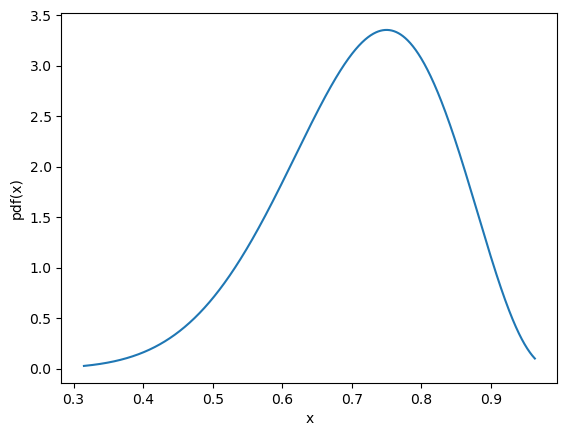

In [8]:
B._posterior.plot("pdf")

# Updating

A significant advantage of the Bayesian approach is its ability to incorporate new data and continuously update our posterior distribution. Suppose we conduct 100 additional coin tosses and observe that, unexpectedly, 80 of these new tosses result in tails:

In [9]:
# Define the number of ones and zeros
ones = [1] * 20
zeros = [0] * 80

# Combine them into a single list
data = ones + zeros

# Shuffle the list to randomize the order
np.random.shuffle(data)

# Create a Series from the shuffled list
y2 = pd.Series(data, name="head")

y2

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    1
98    0
99    0
Name: head, Length: 100, dtype: int64

This new data can be integrated into our existing model to further refine our belief about the coin's fairness. We do so using the `update` method.

In [10]:
X = y2
B.update(X, y2)

BayesianProportionEstimator(prior=Beta(alpha=2, beta=2), prior_alpha=2,
                            prior_beta=2)

We see that after this update, the posterior becomes $\text{Beta}(\alpha=30, \beta=84)$, which is a left-skewing distribution with a mean of 0.263.

In [11]:
B._posterior

Beta(alpha=30, beta=84)

In [12]:
B._posterior.mean()

0.2631578947368421

<Axes: xlabel='x', ylabel='pdf(x)'>

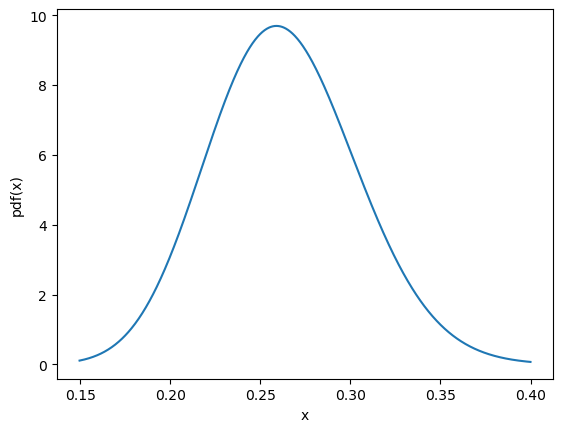

In [13]:
B._posterior.plot("pdf")